### 0. Coding environment set up

In [1]:
#Import packages
from arcgis import GIS
import pandas as pd
%matplotlib inline

In [3]:
#Connect to ArcGIS Online
gis = GIS('pro')

### 1. Get our data (hair HG)

<Item title:"Hair_HG" type:Feature Layer Collection owner:jpfay_dukeuniv>
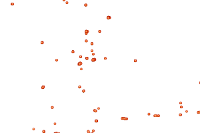

In [16]:
#Import Hair HG data from AGOL as a feature layer collection
lyrcoll_HairHG = gis.content.get('7a2225034b4447d3a8dd69357b45fa07')
lyrcoll_HairHG

In [24]:
#Get the first (and only) feature layer from the feature layer collection
lyr_HairHG = lyrcoll_HairHG.layers[0]

In [27]:
#Query all data into a feature set, then to a spatial dataframe
sdf_HairHG = lyr_HairHG.query().sdf
sdf_HairHG.head()

,OBJECTID,Community,HAIR_HG,LAT,LON,SHAPE
0,1,AGUAS NEGRAS,3.1250,-12.57595,-69.25097,"{""x"": -7708982.717340257, ""y"": -1411326.456932..."
1,2,AGUAS NEGRAS,1.4652,-12.66256,-69.43082,"{""x"": -7729003.527759432, ""y"": -1421206.507500..."
2,3,AGUAS NEGRAS,3.6553,-12.57595,-69.25097,"{""x"": -7708982.717340257, ""y"": -1411326.456932..."
3,4,AGUAS NEGRAS,3.2883,-12.65843,-69.43379,"{""x"": -7729334.146647089, ""y"": -1420735.301039..."
4,5,AGUAS NEGRAS,2.2550,-12.66256,-69.43082,"{""x"": -7729003.527759432, ""y"": -1421206.507500..."


### 2. Search for Peruvian mining data

In [10]:
#Search for Peru Mining data
search_results = gis.content.search(
    query = "peru, metalogenia", #Keywords
    item_type = 'Feature Layer', #Data type
    outside_org=True)            #Look beyond Duke
#Show the results 
search_results

[<Item title:" GEOCATMIN - Metalogenetico del Peru, escala 1: 3 000 000 año 2014 INGEMMET" type:Feature Layer Collection owner:autonomoosi02@ingemmet.gob.pe_ingemmet_peru>]

<Item title:" GEOCATMIN - Metalogenetico del Peru, escala 1: 3 000 000 año 2014 INGEMMET" type:Feature Layer Collection owner:autonomoosi02@ingemmet.gob.pe_ingemmet_peru>
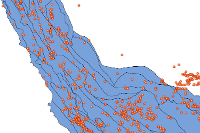

In [29]:
#Save the first (and only) result as a layer
lyrcoll_mining = search_results[0]
lyrcoll_mining

In [ ]:
#Get the first layer (the points) from the layer collection
lyr_mining = lyrcoll_mining.layers[0]

In [43]:
#Convert to a spatial dataframe, querying for only gold mines
sdf_mining =lyr_mining.query("E_PRINCIPA like '%Au%'").sdf
sdf_mining.shape

(1178, 14)

### Analysis: Compute # of mines within 5km each hair sampling location